In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from statsmodels.tsa.seasonal import seasonal_decompose
sns.set()

In [9]:
gapminder = pd.read_excel('data/gapminder.xlsx')
gapminder.drop(columns='Unnamed: 0', axis=0, inplace=True)
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [18]:
gapminder07 = gapminder[gapminder['year'] == 2007]
gapminder07.describe()

,year,lifeExp,pop,gdpPercap,log_gdpPercap
count,142.0,142.000000,1.420000e+02,142.000000,142.000000
mean,2007.0,67.007423,4.402122e+07,11680.071820,3.741789
std,0.0,12.073021,1.476214e+08,12859.937337,0.588893
min,2007.0,39.613000,1.995790e+05,277.551859,2.443344
25%,2007.0,57.160250,4.508034e+06,1624.842248,3.210643
50%,2007.0,71.935500,1.051753e+07,6124.371108,3.787005
75%,2007.0,76.413250,3.121004e+07,18008.835640,4.255486
max,2007.0,82.603000,1.318683e+09,49357.190170,4.693350


F:\IU\Semester 2\MLSP\Anaconda_Environment\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


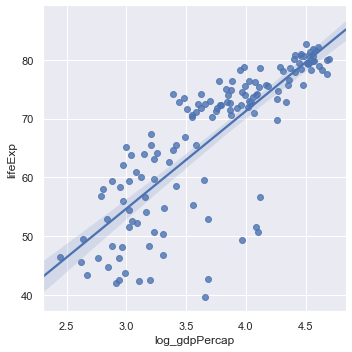

In [16]:
gapminder07['log_gdpPercap'] = np.log10(gapminder07['gdpPercap'])
sns.lmplot('log_gdpPercap', 'lifeExp', gapminder07)

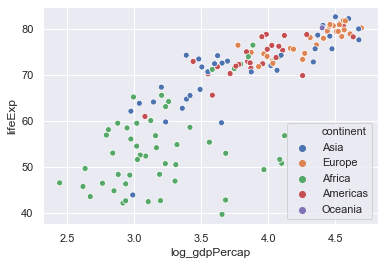

In [21]:
sns.scatterplot(x='log_gdpPercap', y='lifeExp', data=gapminder07, hue='continent')

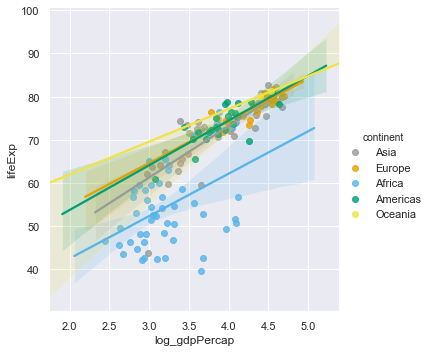

In [23]:
cb_palette = ["#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]
sns.set_palette(cb_palette)
sns.lmplot(x='log_gdpPercap', y='lifeExp', data=gapminder07, hue='continent')

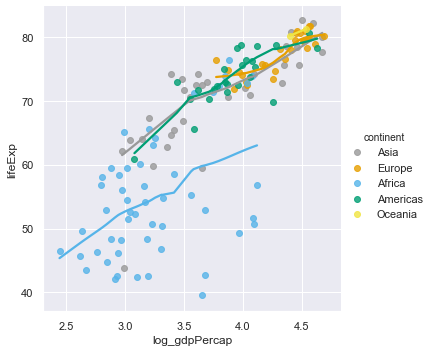

In [26]:
sns.lmplot(x='log_gdpPercap', y='lifeExp', data=gapminder07, hue='continent', lowess=True)

#### Time Series Data

In [56]:
gpd = pd.read_excel('data/gpd.xlsx', parse_dates=[0], header=0)
gpd.head()

,DATE,GDPC1
0,1947-01-01,2033.061
1,1947-04-01,2027.639
2,1947-07-01,2023.452
3,1947-10-01,2055.103
4,1948-01-01,2086.017


In [60]:
gpd_ts = gpd.set_index('DATE').asfreq('Q', method='ffill')

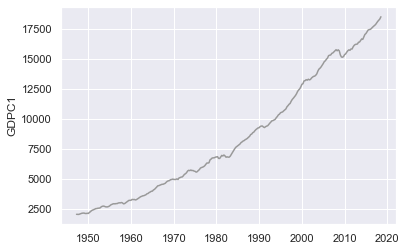

In [61]:
sns.lineplot(gpd_ts.index.values, gpd_ts['GDPC1'])

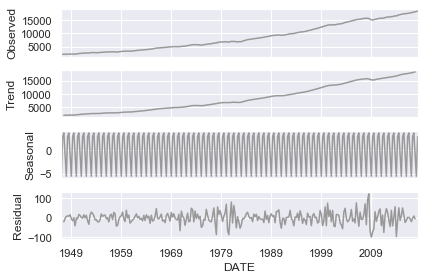

In [62]:
result = seasonal_decompose(gpd_ts, model='additive')
result.plot()
pyplot.show()

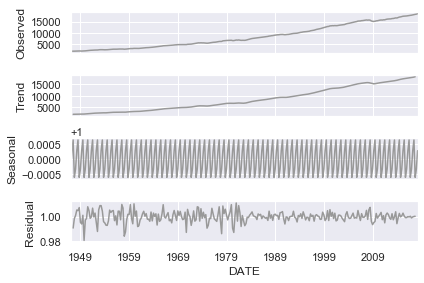

In [63]:
result = seasonal_decompose(gpd_ts, model='multiplicative')
result.plot()
pyplot.show()